<a href="https://colab.research.google.com/github/BartekFranczak/CPO---MEL/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 

uploaded = files.upload()

Saving img.zip to img.zip


In [2]:
from zipfile import ZipFile

file_name = '/content/img.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()


In [3]:
import os 

path = '/content/img'
im_names = os.listdir(path)
im_paths = [os.path.join(path,name) for name in im_names]

im_types =[]
#circle - 0, rectangle - 1
for name in im_names:
  if 'cric' in name:
    im_types.append(0)
  else:
    im_types.append(1)


In [4]:
import numpy as np
def get_treshold(im):
  
  T = np.mean(im)
  while(1):
    higher = im.copy() 
    lower = im.copy()
    
    higher[higher<T]=0
    lower[lower>=T]=0

    N_h = np.count_nonzero(higher)
    N_l = np.count_nonzero(lower)

    mean_h = np.sum(higher)/N_h
    mean_l = np.sum(lower)/N_l

    T1 = (mean_h + mean_l)/2

    if (T1-T)<1:
      T = int(T1)
      break
    else: 
      T = int(T1)
  
  return T


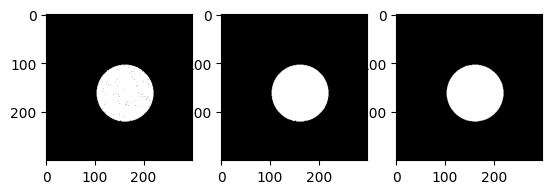

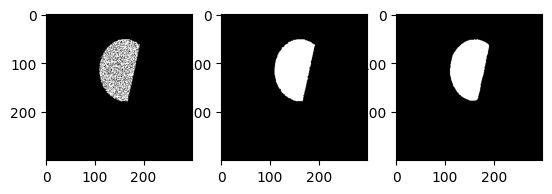

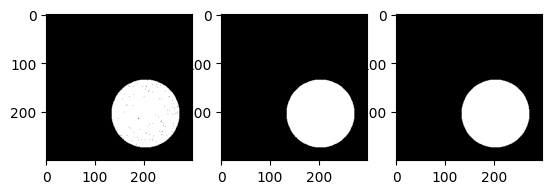

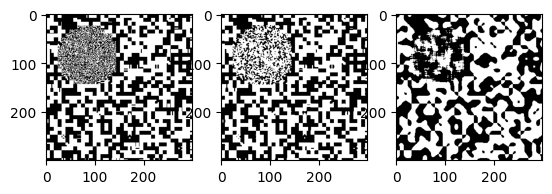

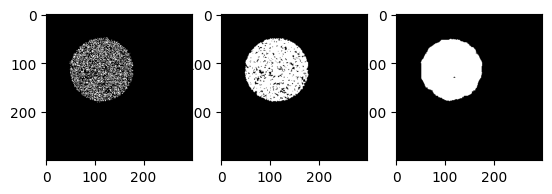

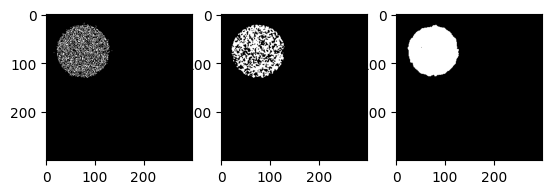

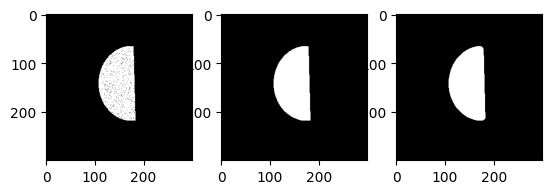

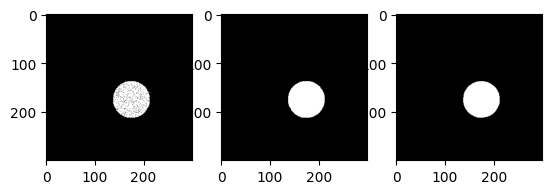

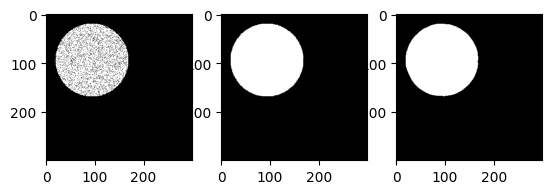

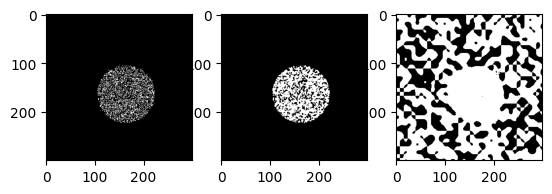

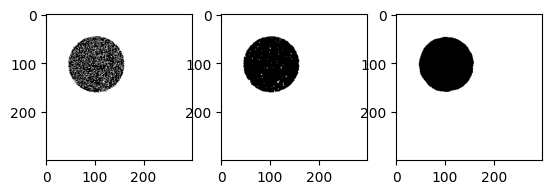

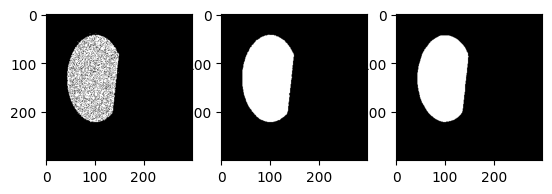

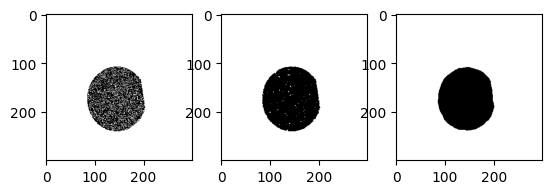

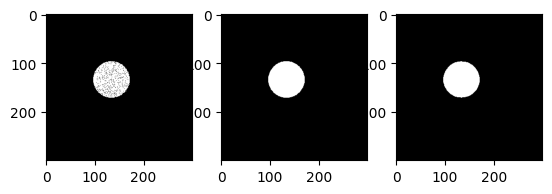

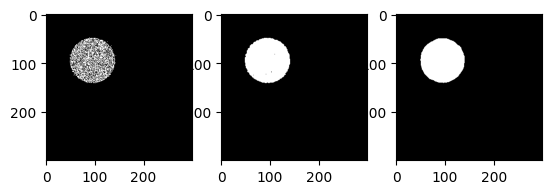

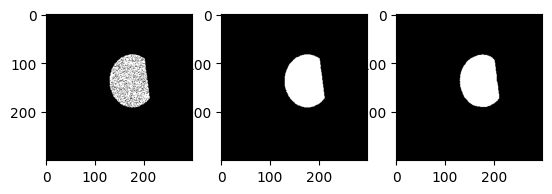

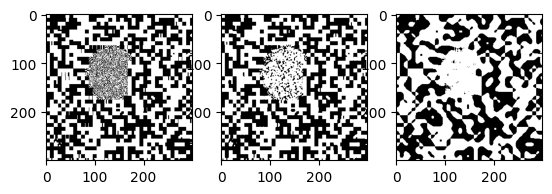

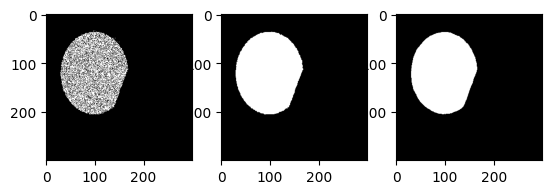

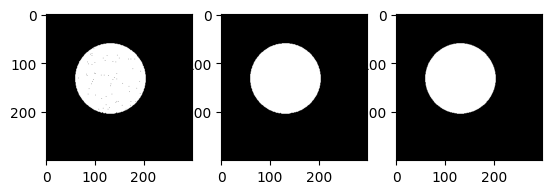

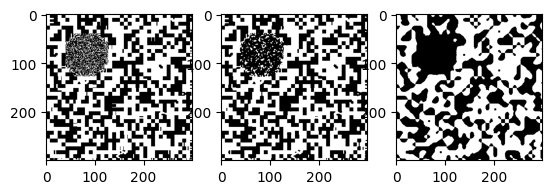

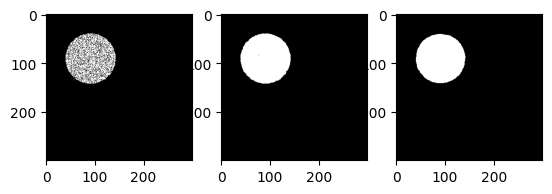

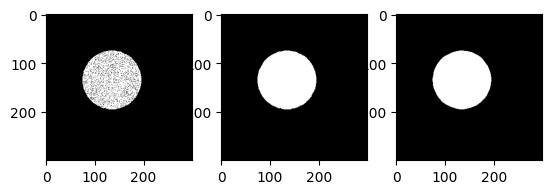

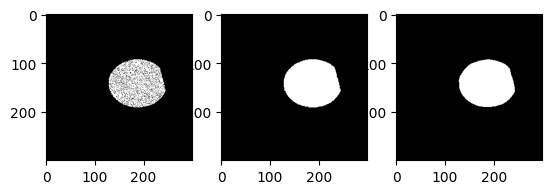

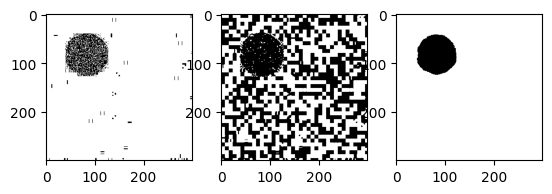

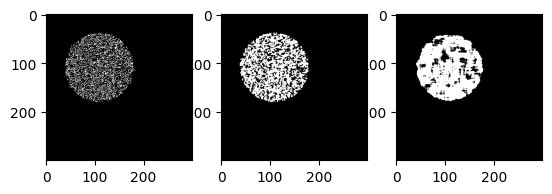

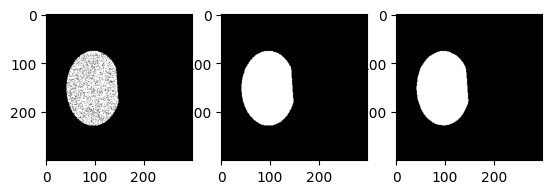

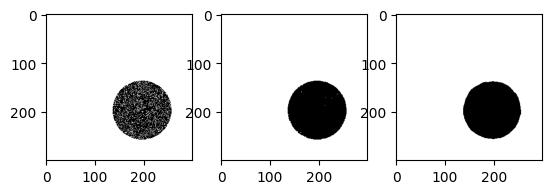

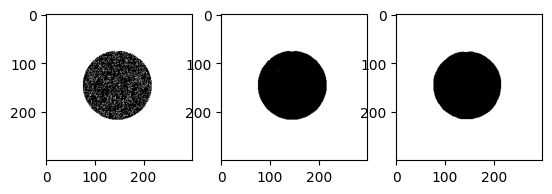

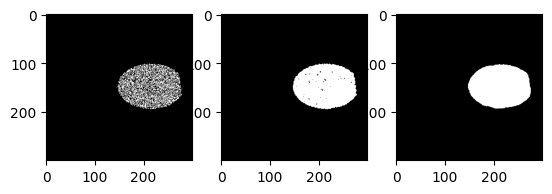

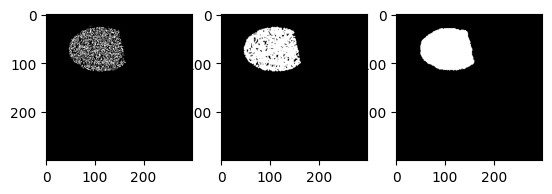

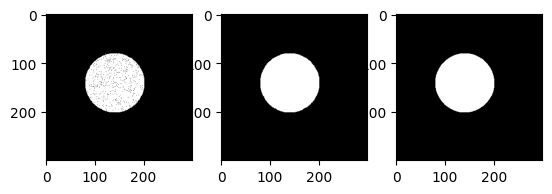

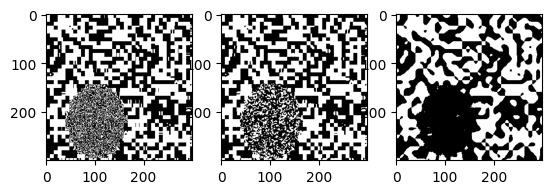

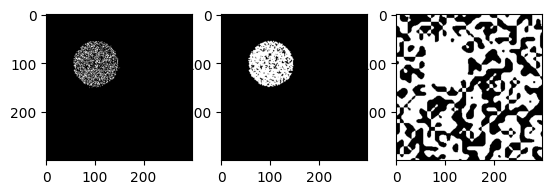

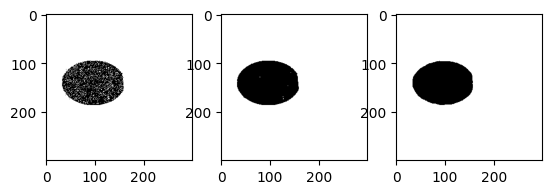

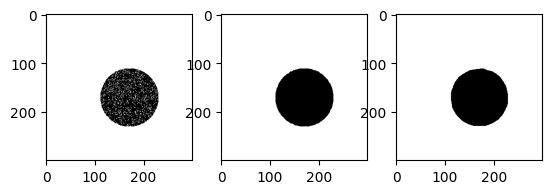

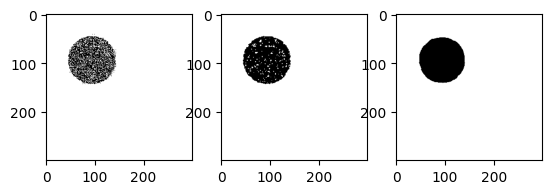

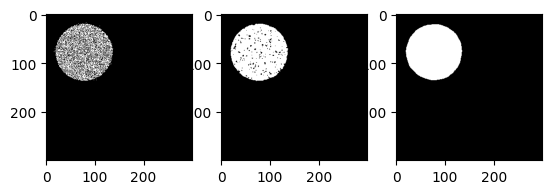

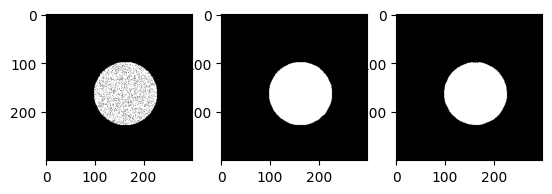

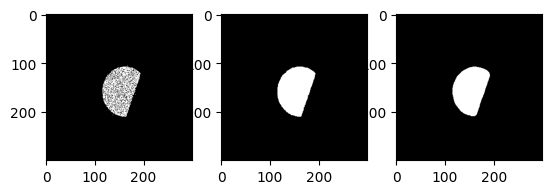

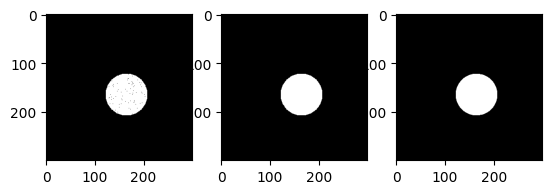

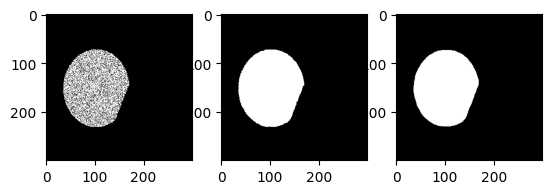

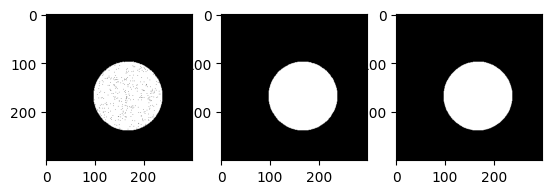

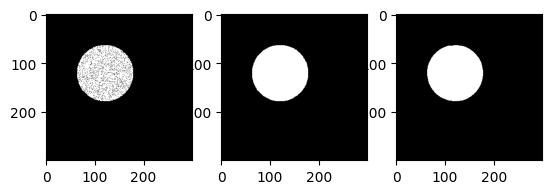

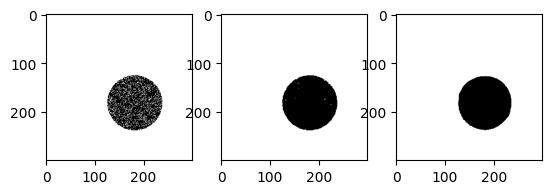

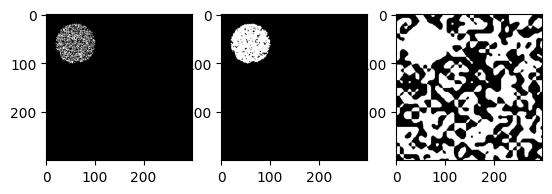

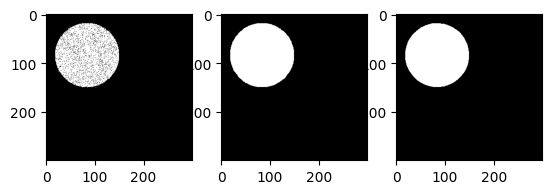

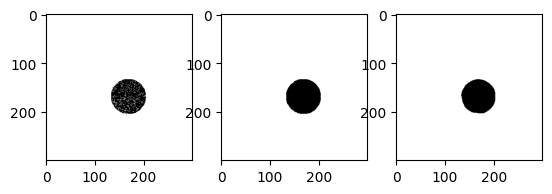

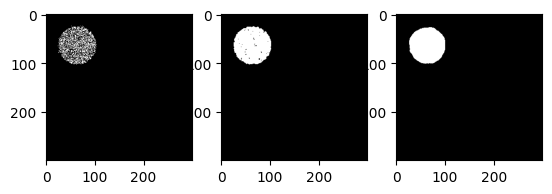

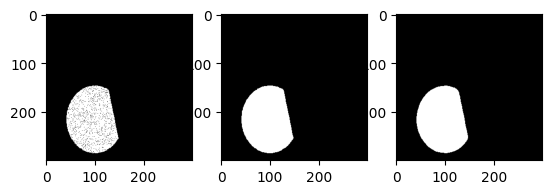

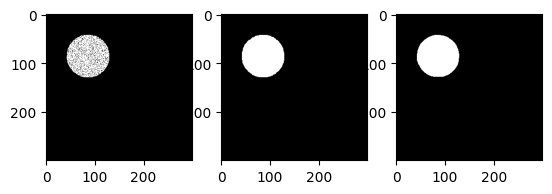

In [5]:
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
for i in range(len(im_names)):
  if im_types[i]==0:
    
    im = cv2.imread(im_paths[i],0)
    im2 = cv2.GaussianBlur(im,(11,11),0.9)
    im3 = cv2.medianBlur(im,11)
    threshold = get_treshold(im)
    threshold2 = get_treshold(im2)
    threshold3 = get_treshold(im3)


    im[im>threshold] = 255
    im[im<=threshold] = 0
    im2[im2>threshold2] = 255
    im2[im2<=threshold2] = 0
    im3[im3>threshold3] = 255
    im3[im3<=threshold3] = 0
    plt.subplot(1, 3, 1)
    plt.imshow(im, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 2)
    plt.imshow(im2, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 3)
    plt.imshow(im3, cmap=plt.get_cmap('gray'))
    plt.show()


Problemy:
1. kolor obiektu raz jasny raz ciemny
2. Nieregularny kształt obiektu
3. Szum gausowski
4. Szum sól i pieprz 
5. Różne wypełnienie obiektów na obrazie binarnym

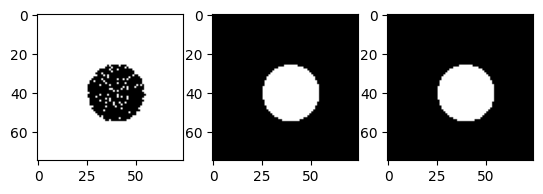

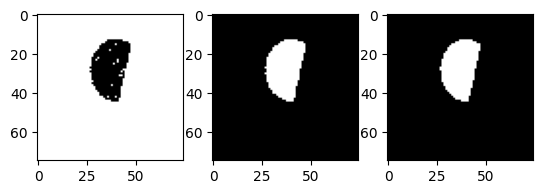

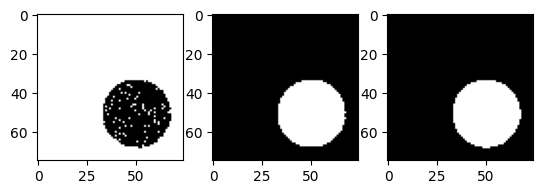

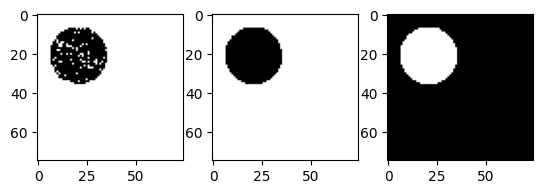

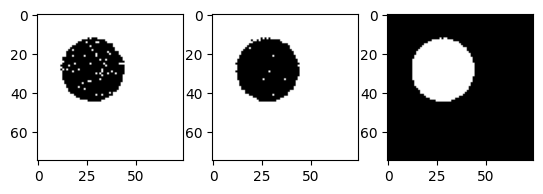

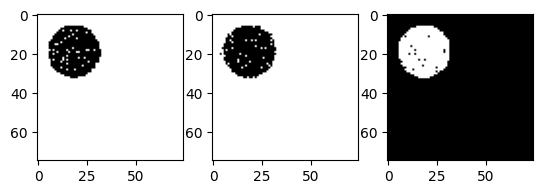

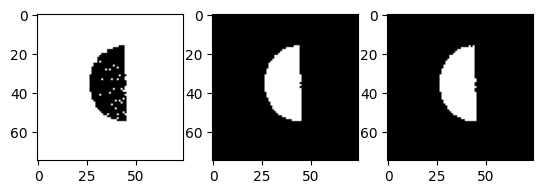

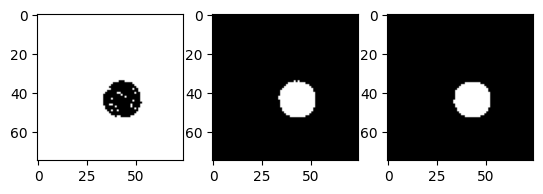

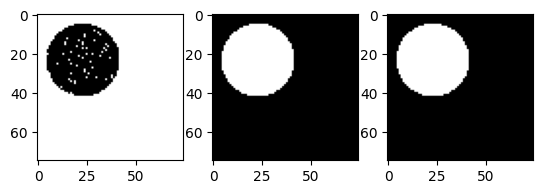

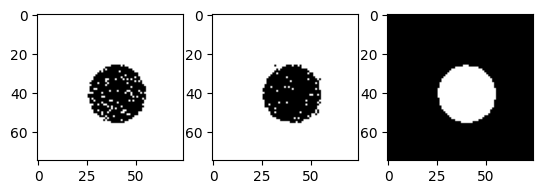

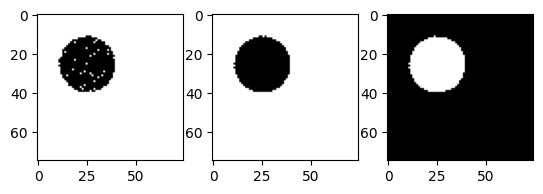

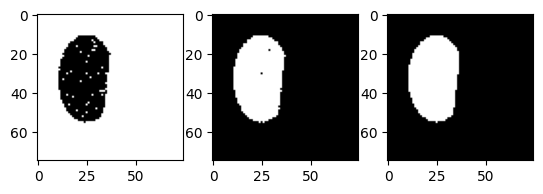

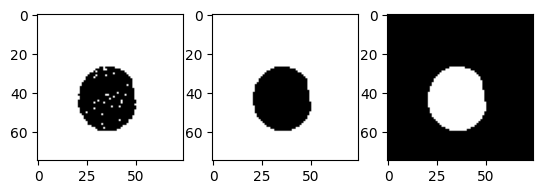

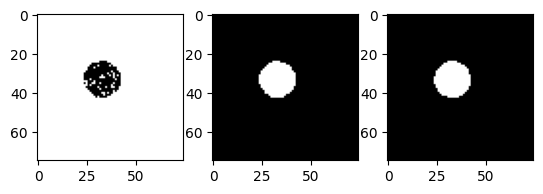

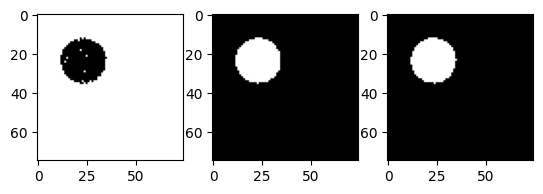

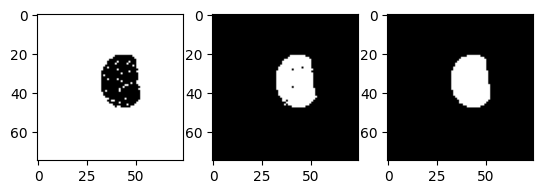

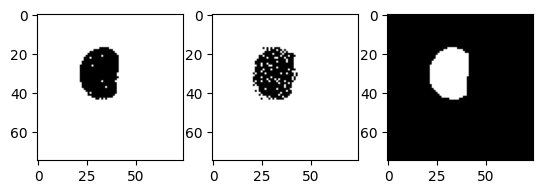

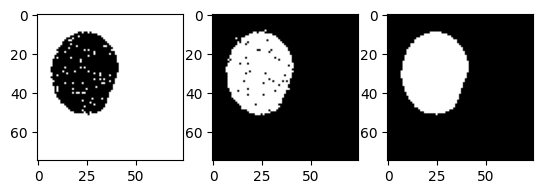

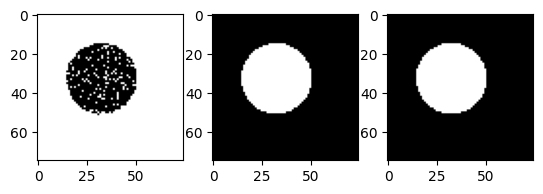

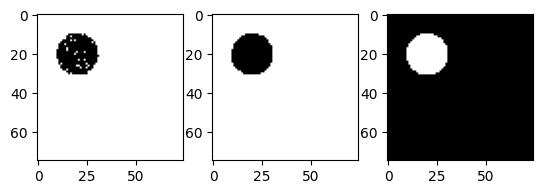

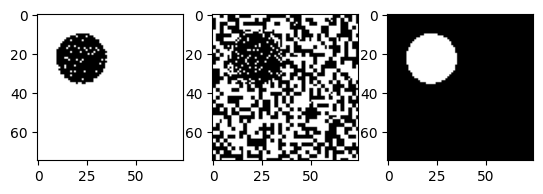

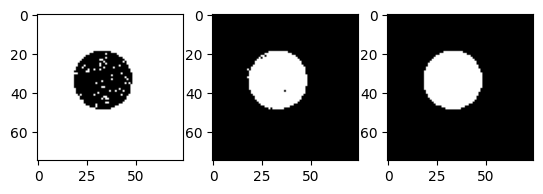

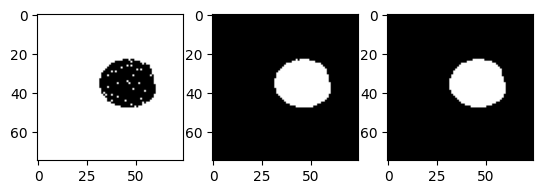

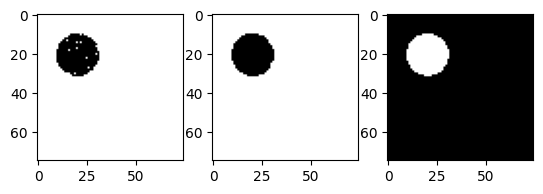

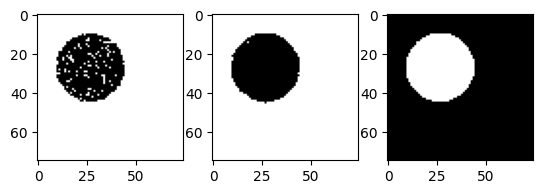

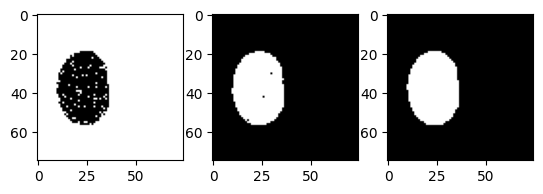

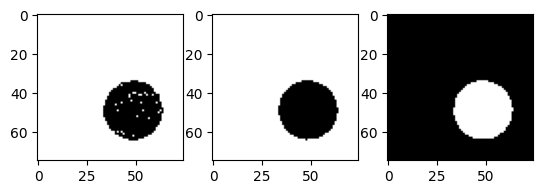

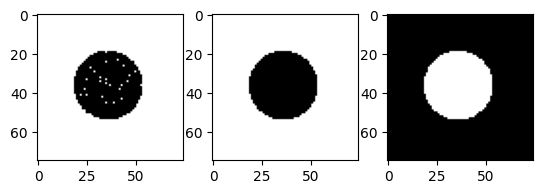

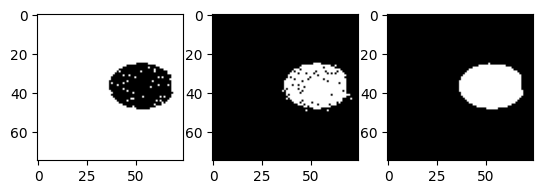

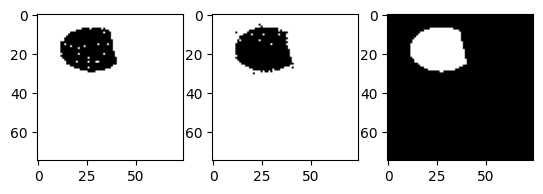

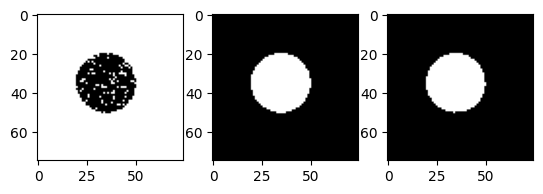

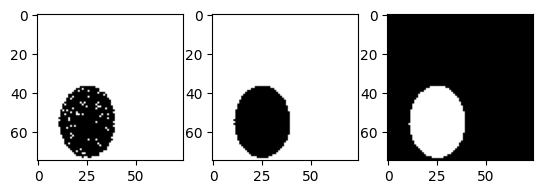

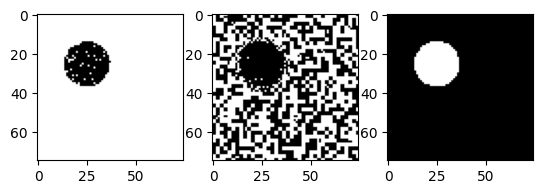

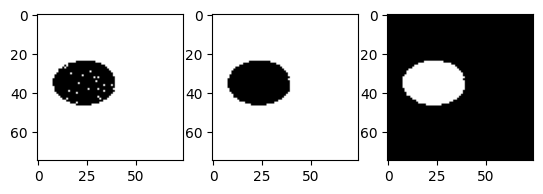

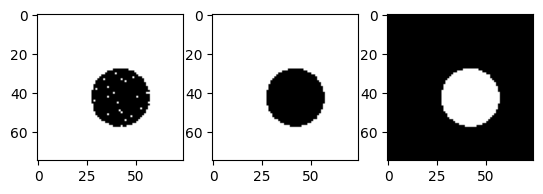

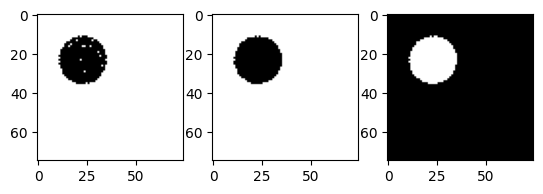

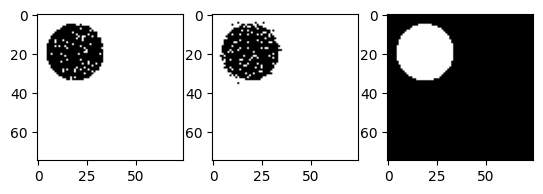

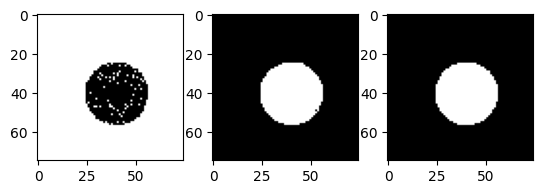

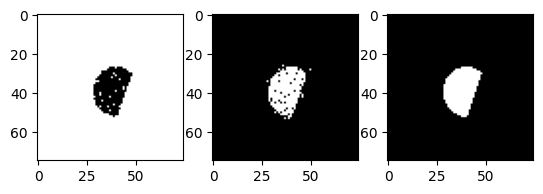

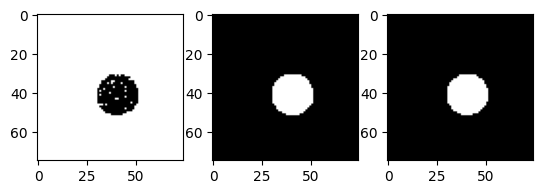

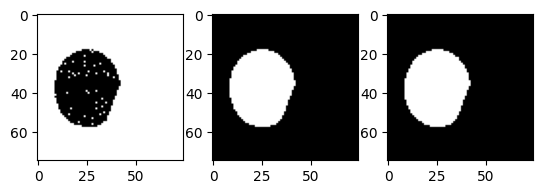

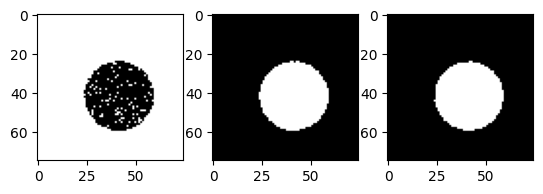

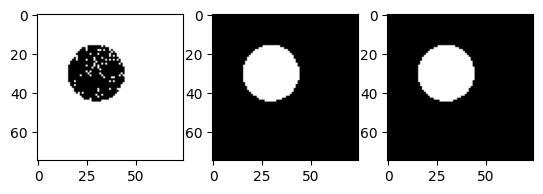

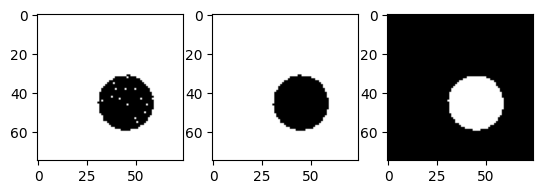

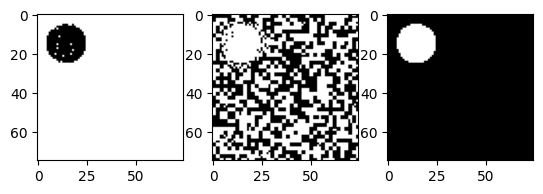

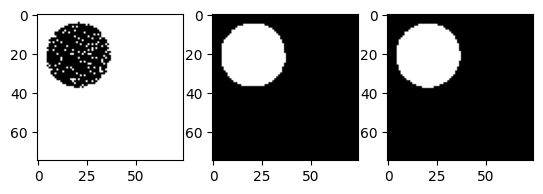

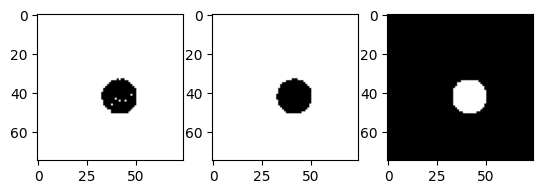

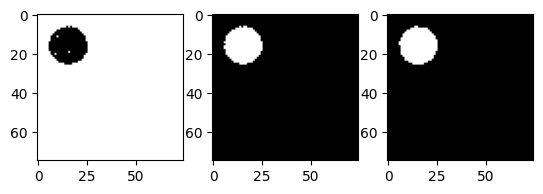

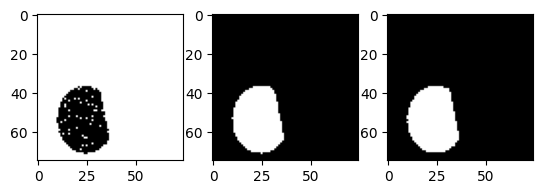

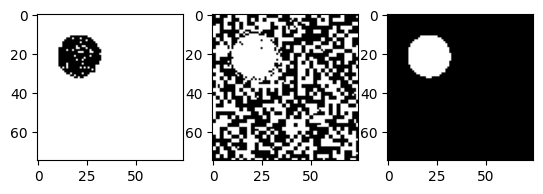

In [6]:
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
for i in range(len(im_names)):
  if im_types[i]==0:
    
    im_hsv = cv2.imread(im_paths[i],cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(im_hsv)
    im =h
    threshold = get_treshold(h)
    threshold2 = get_treshold(s)
    threshold3 = get_treshold(v)


    h[h>threshold] = 255
    h[h<=threshold] = 0
    s[s>threshold2] = 255
    s[s<=threshold2] = 0
    v[v>threshold3] = 255
    v[v<=threshold3] = 0
    plt.subplot(1, 3, 1)
    plt.imshow(h, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 2)
    plt.imshow(s, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 3)
    plt.imshow(v, cmap=plt.get_cmap('gray'))
    plt.show()


1. Jak można zobaczyć, na powyższym diagramie szym znajdujący się na sprogowanych obrazach występuje głównie w warstwie Saturation, dlatego do analizy warto wykorzystać warstwę Hue lub Value. 
2. Warto zauważyć, że w sprogowanych warstwach Hue i Value, w niektórych przypadkach występuje szum typu Sól i pieprz. Możemy go usunąć poprzez zastosowanie filtru medianowego lub morfologicznej operacji otwarcia

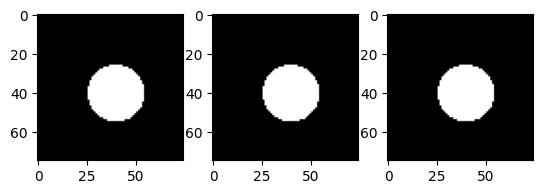

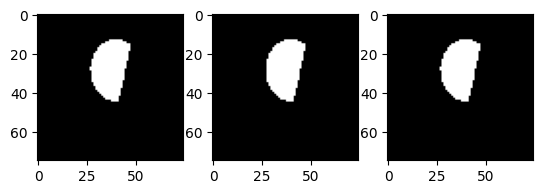

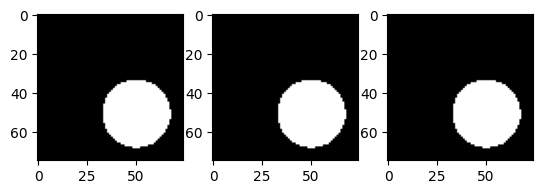

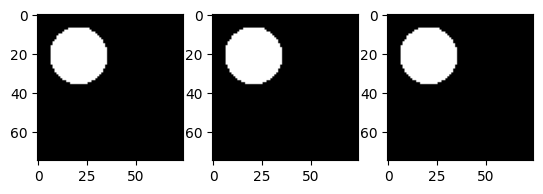

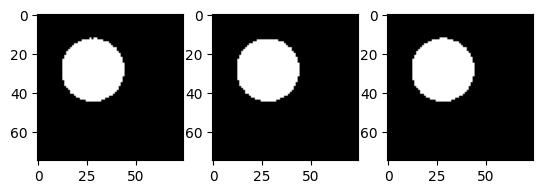

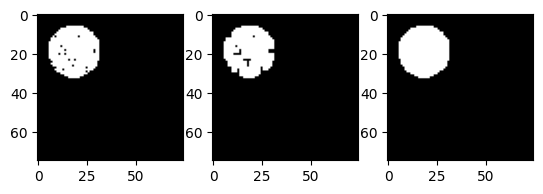

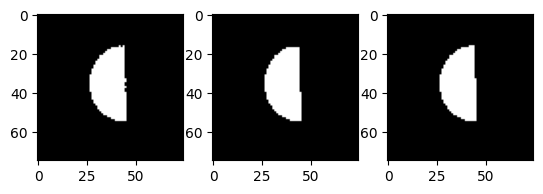

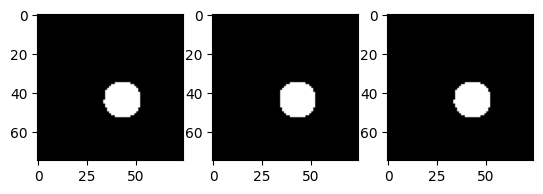

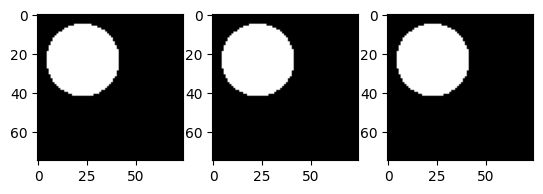

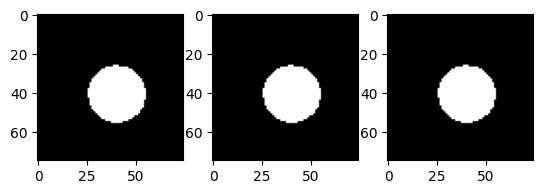

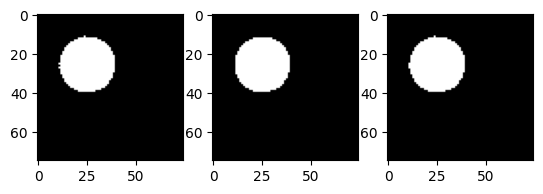

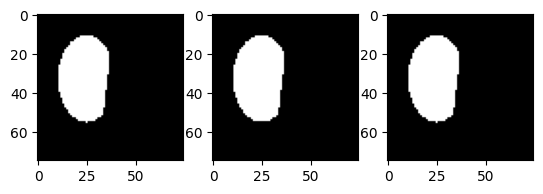

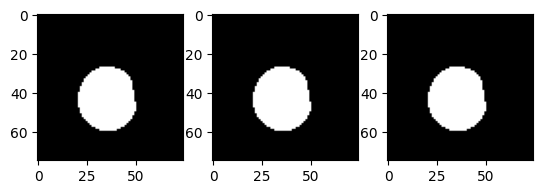

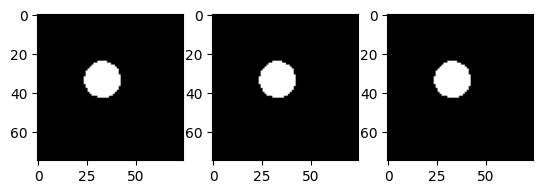

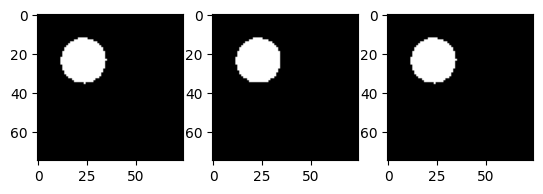

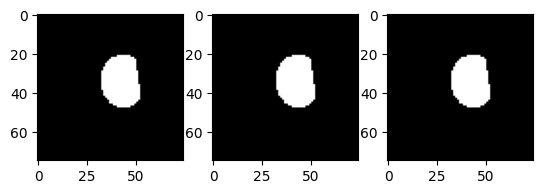

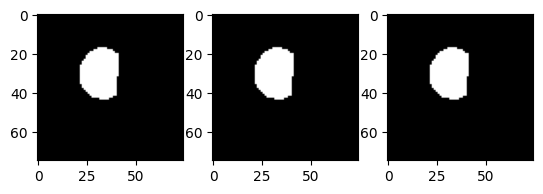

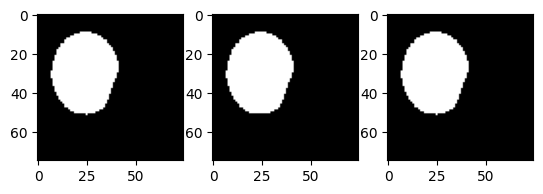

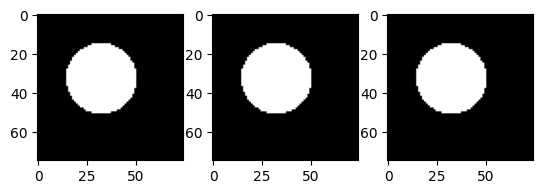

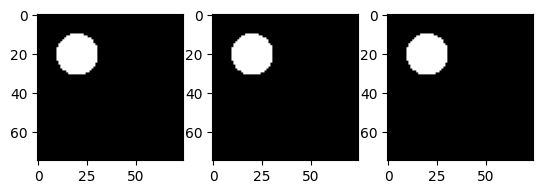

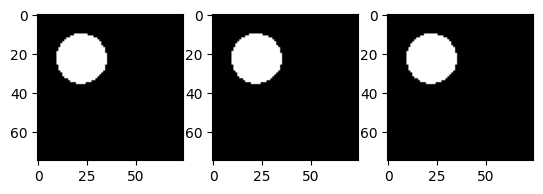

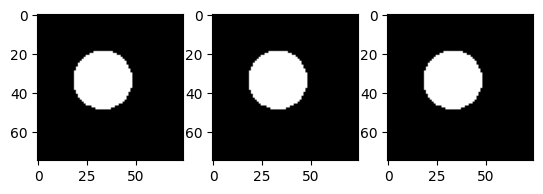

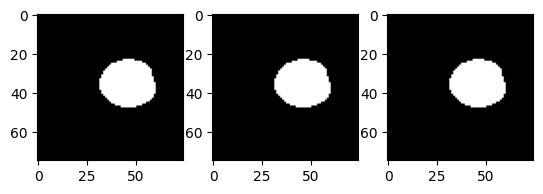

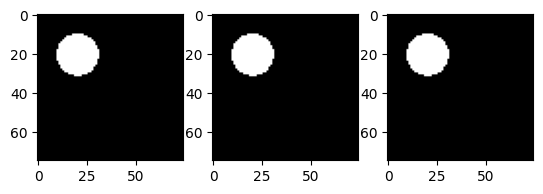

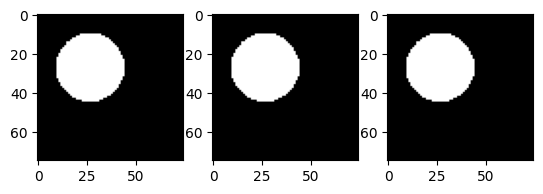

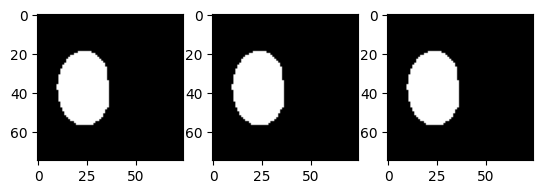

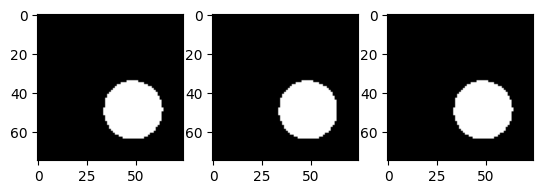

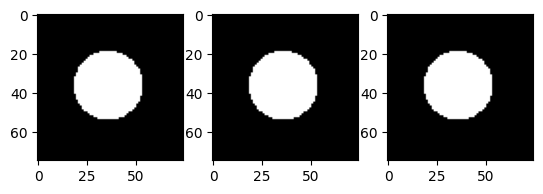

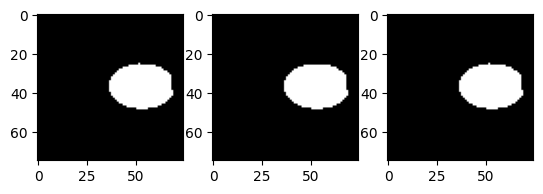

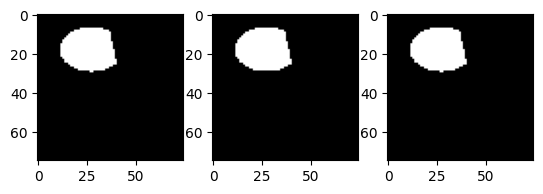

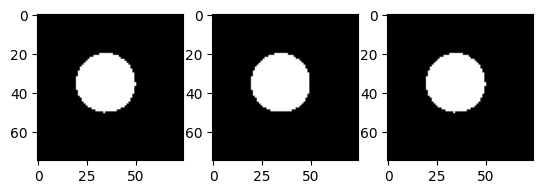

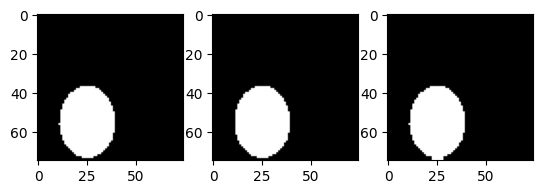

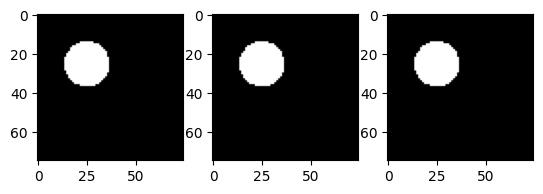

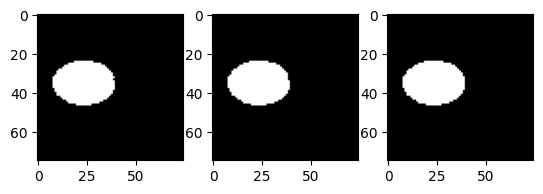

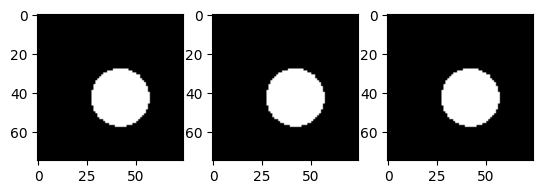

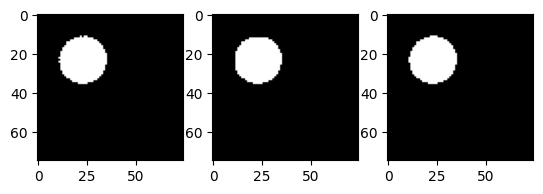

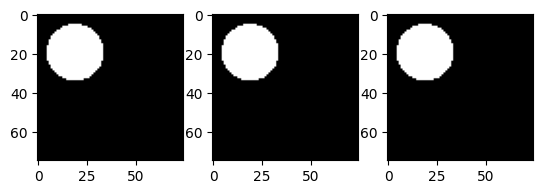

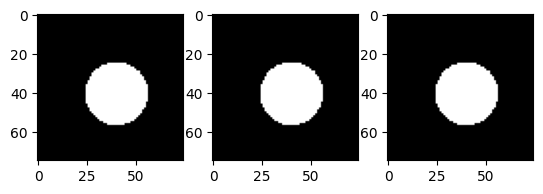

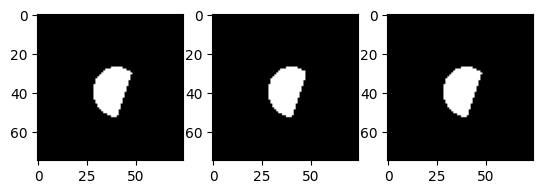

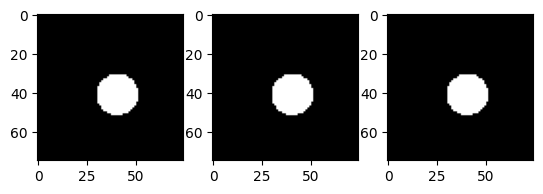

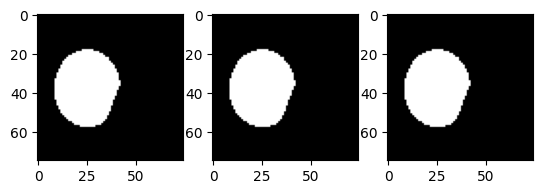

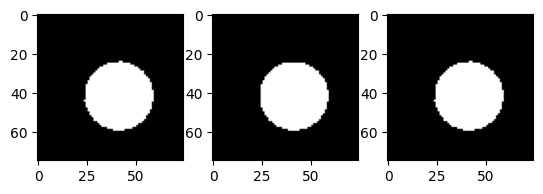

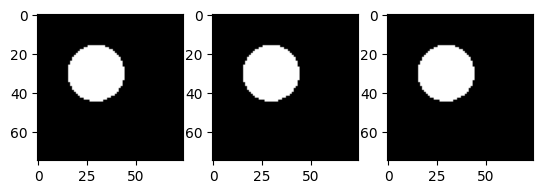

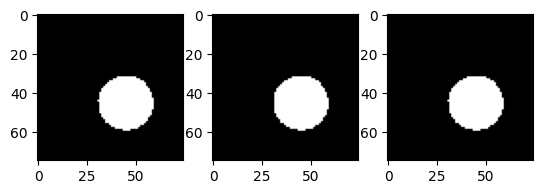

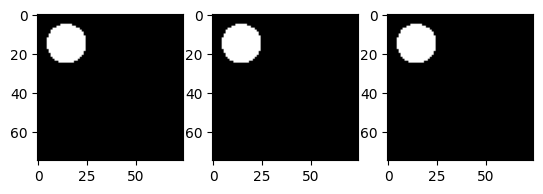

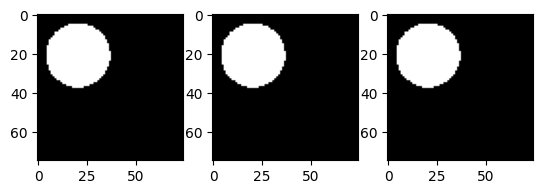

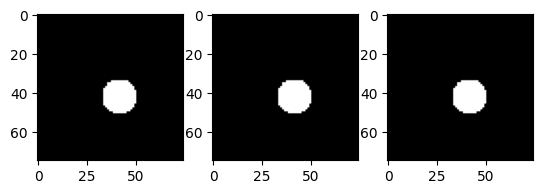

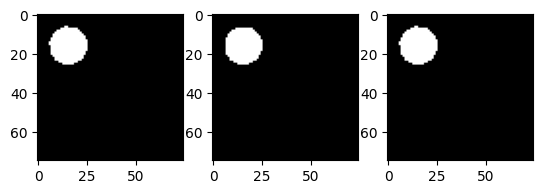

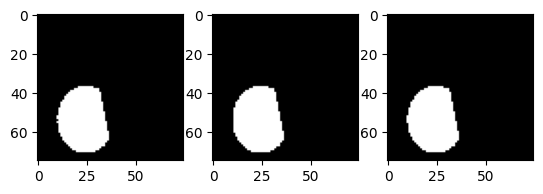

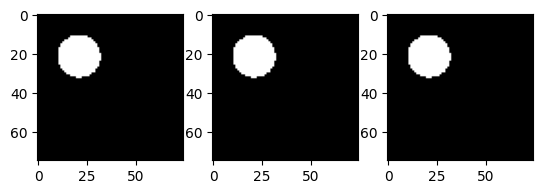

In [7]:
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
for i in range(len(im_names)):
  if im_types[i]==0:
    
    im_hsv = cv2.imread(im_paths[i],cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(im_hsv)

    threshold3 = get_treshold(v)

    v[v>threshold3] = 255
    v[v<=threshold3] = 0
    v_cp = v.copy()

    #kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    kernel = np.ones((3,3),np.uint8)
    v2 = cv2.morphologyEx(v_cp, cv2.MORPH_OPEN, kernel)
    v3 = cv2.morphologyEx(v_cp, cv2.MORPH_CLOSE, kernel)
    
    plt.subplot(1, 3, 1)
    plt.imshow(v, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 2)
    plt.imshow(v2, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 3, 3)
    plt.imshow(v3, cmap=plt.get_cmap('gray'))
    plt.show()

sprawdzam działanie programu w przypadku prostokątów

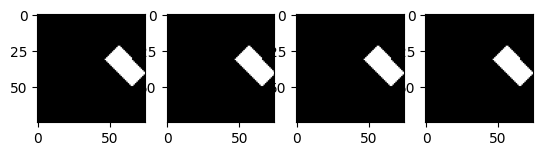

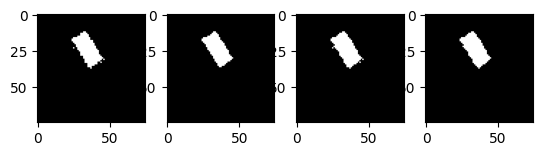

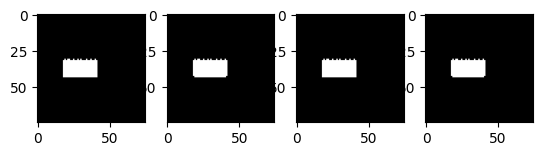

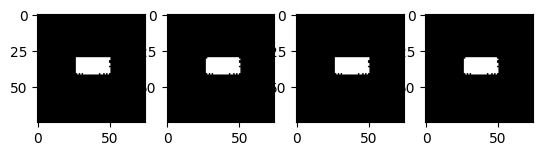

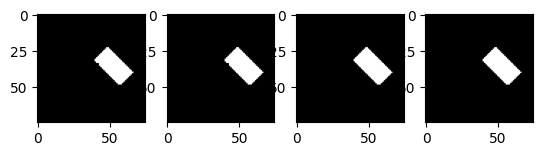

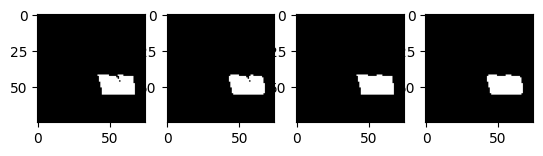

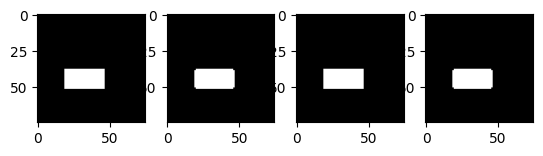

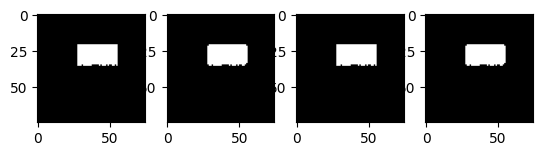

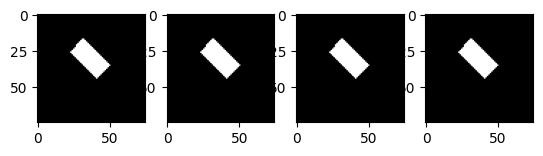

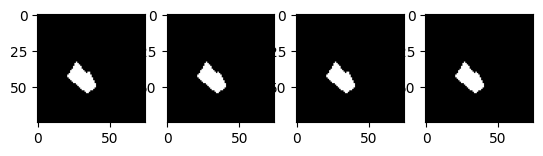

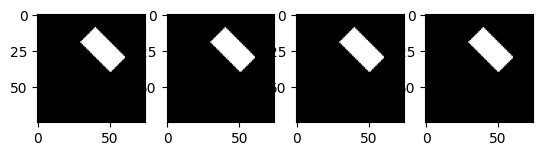

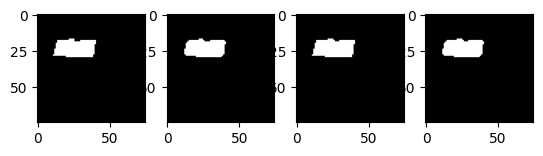

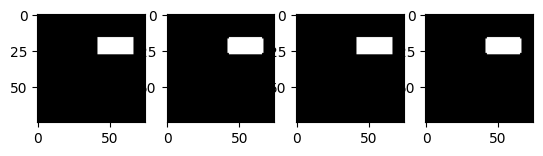

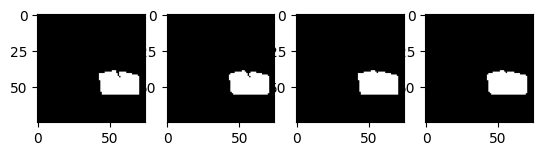

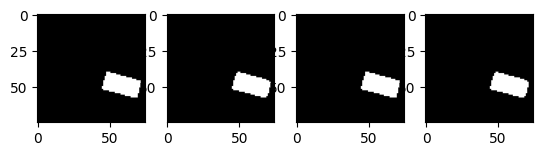

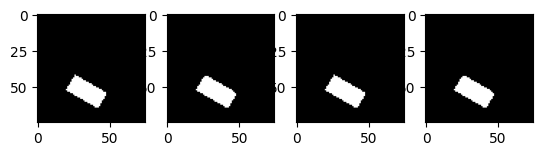

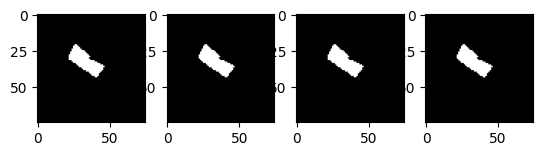

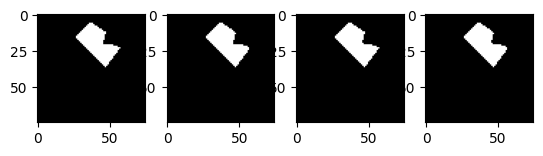

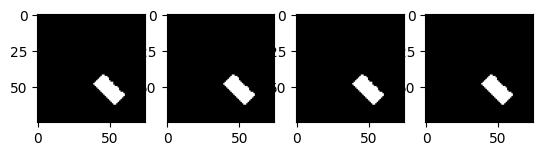

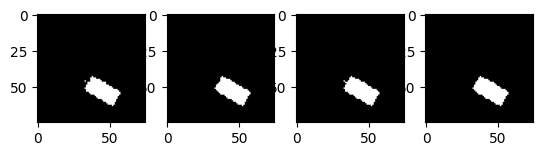

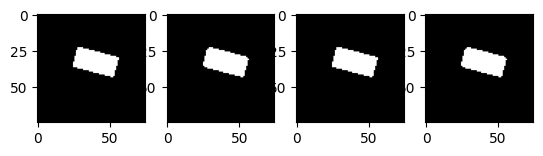

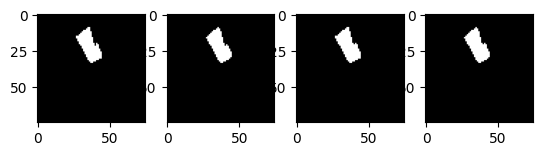

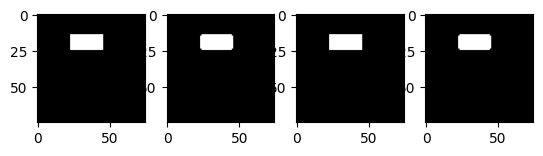

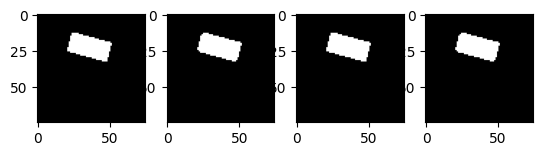

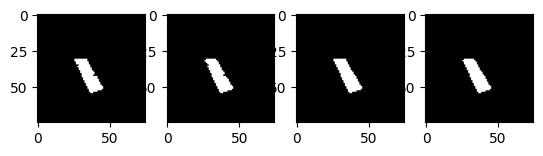

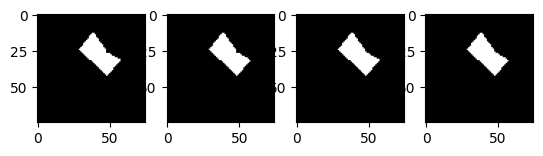

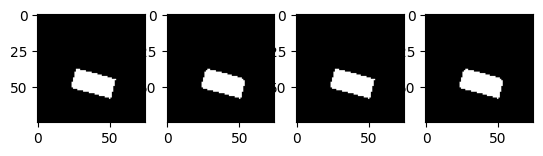

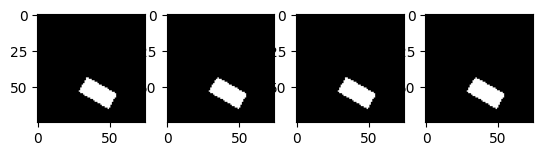

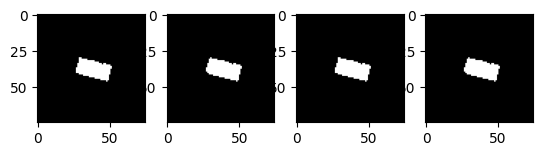

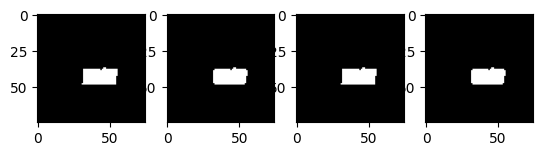

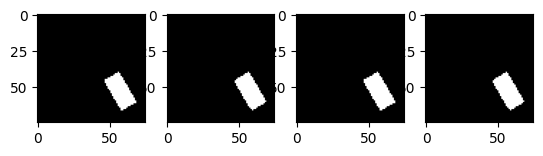

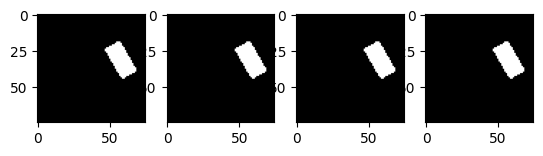

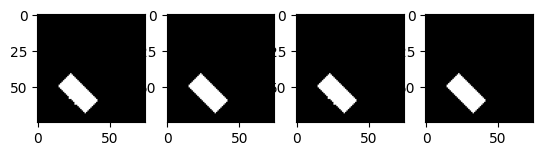

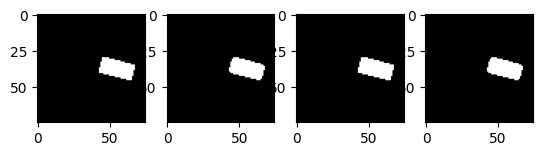

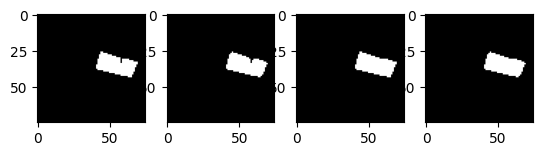

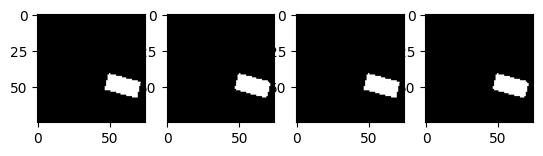

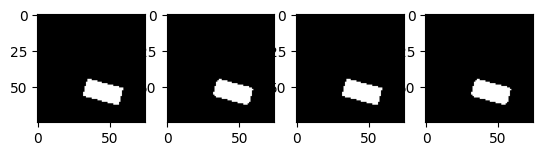

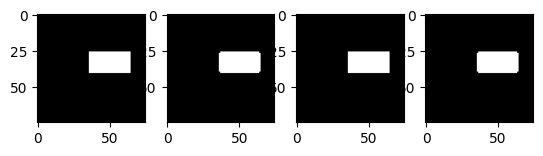

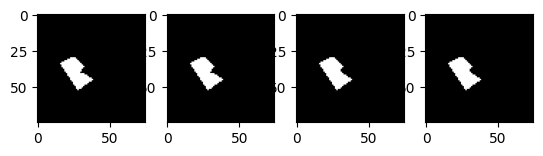

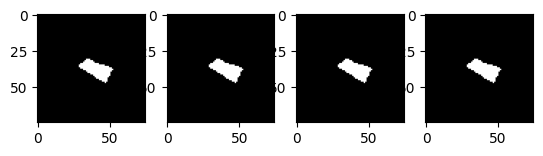

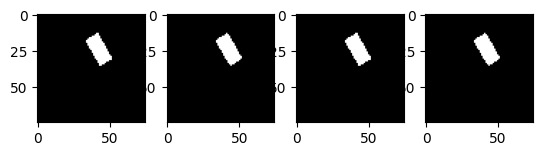

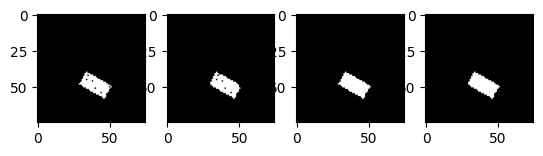

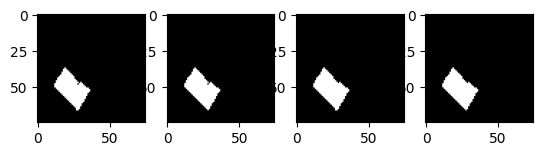

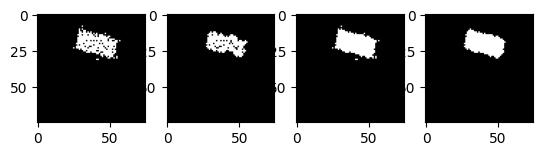

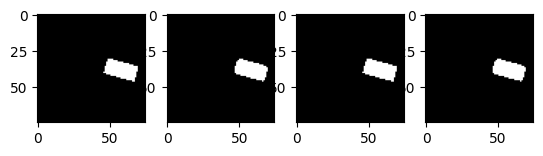

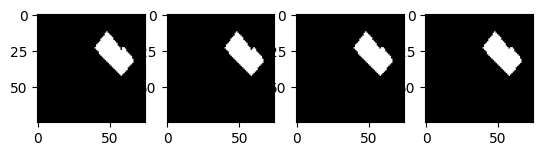

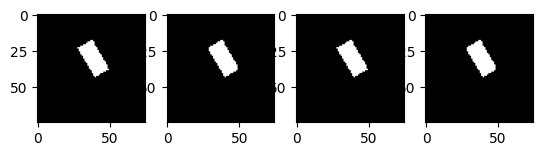

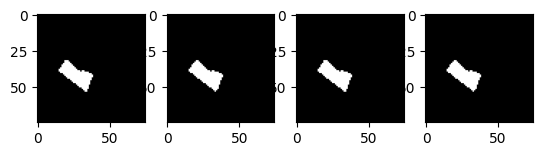

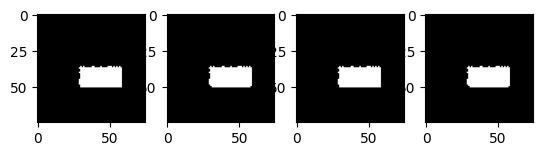

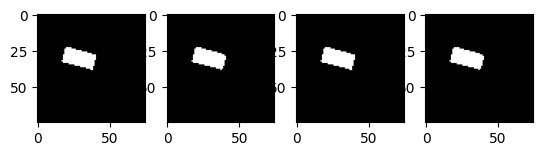

In [8]:
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
for i in range(len(im_names)):
  if im_types[i]==1:
    
    im_hsv = cv2.imread(im_paths[i],cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(im_hsv)

    threshold3 = get_treshold(v)

    v[v>threshold3] = 255
    v[v<=threshold3] = 0
    v_cp = v.copy()

    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    #kernel = np.ones((3,3),np.uint8)
    v2 = cv2.morphologyEx(v_cp, cv2.MORPH_OPEN, kernel)
    
    v3 = cv2.morphologyEx(v_cp, cv2.MORPH_CLOSE, kernel)

    v4 = cv2.morphologyEx(v_cp, cv2.MORPH_CLOSE, kernel)
    v4 = cv2.morphologyEx(v4, cv2.MORPH_OPEN, kernel)
    
    plt.subplot(1, 4, 1)
    plt.imshow(v, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 4, 2)
    plt.imshow(v2, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 4, 3)
    plt.imshow(v3, cmap=plt.get_cmap('gray'))
    plt.subplot(1, 4, 4)
    plt.imshow(v4, cmap=plt.get_cmap('gray'))
    plt.show()

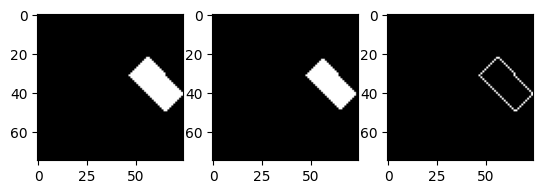

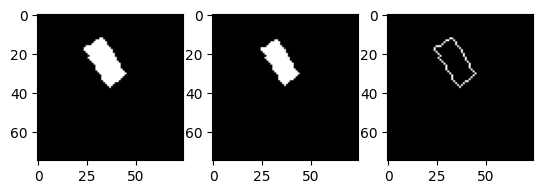

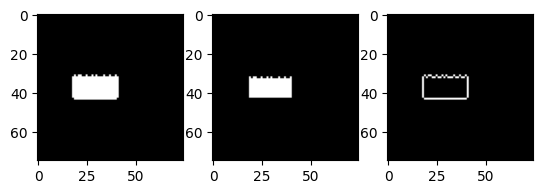

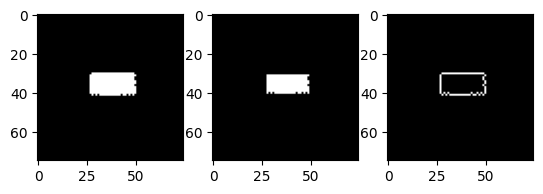

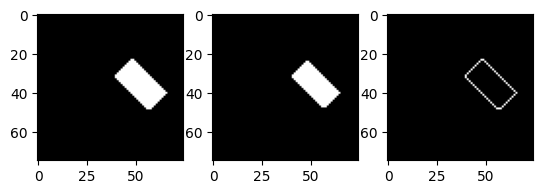

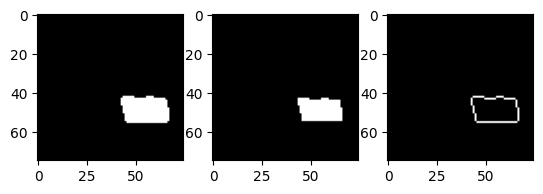

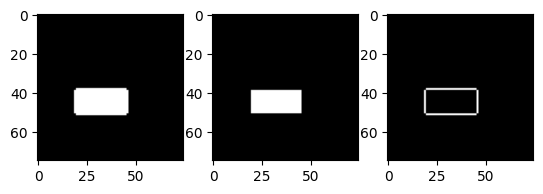

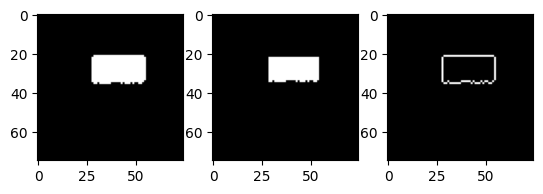

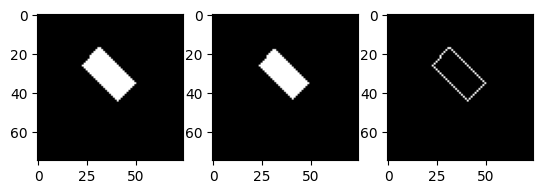

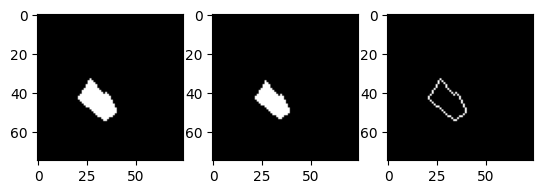

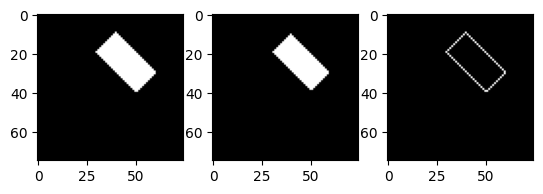

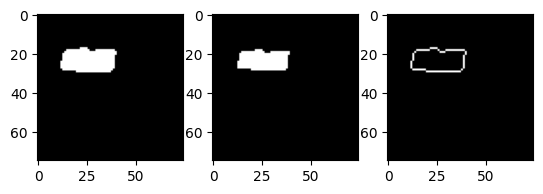

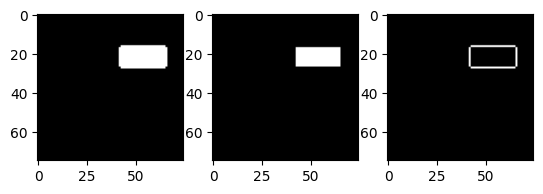

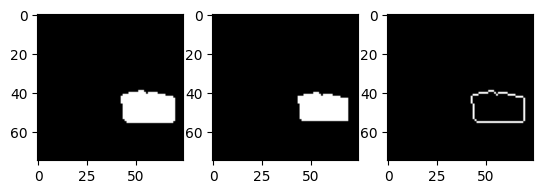

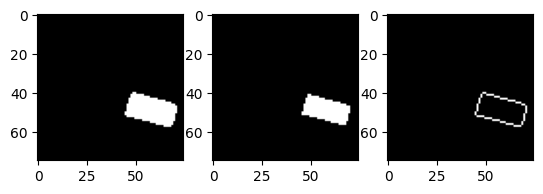

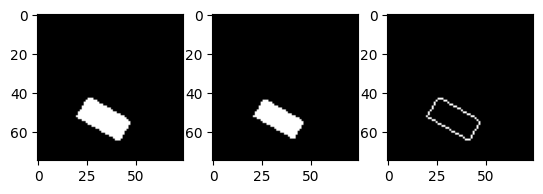

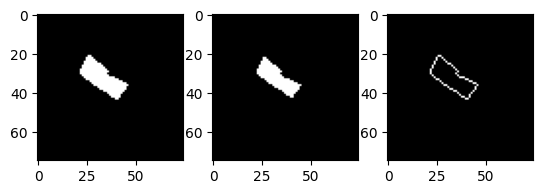

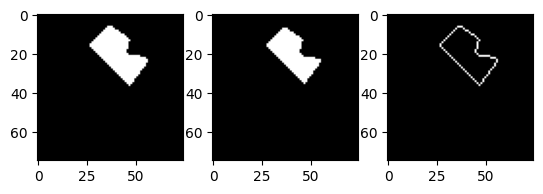

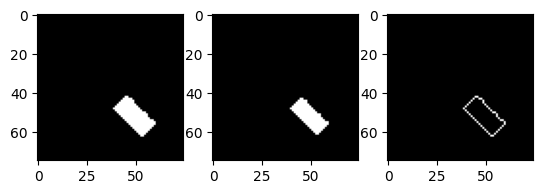

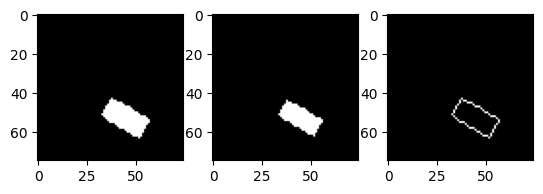

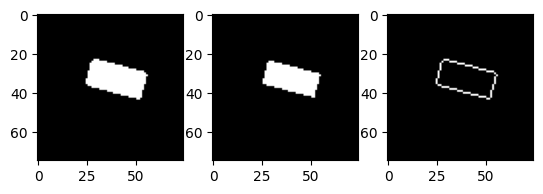

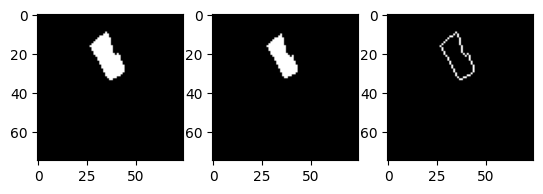

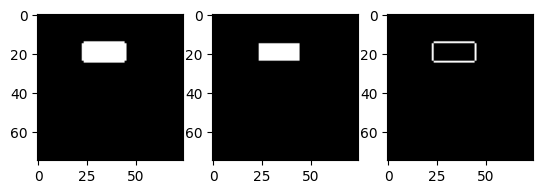

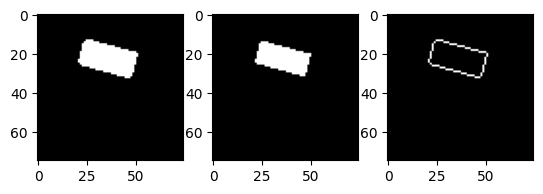

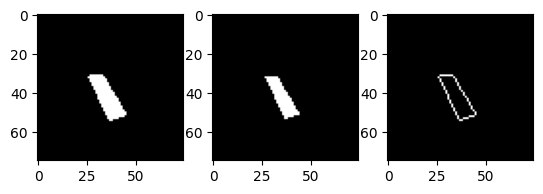

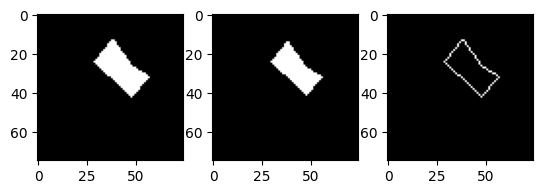

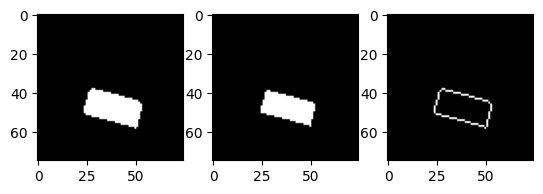

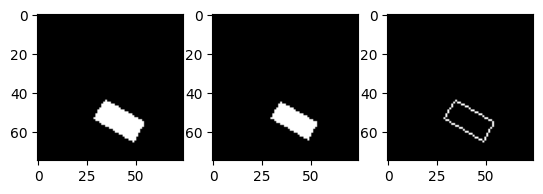

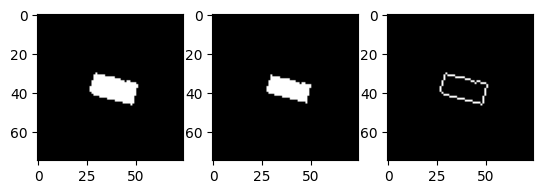

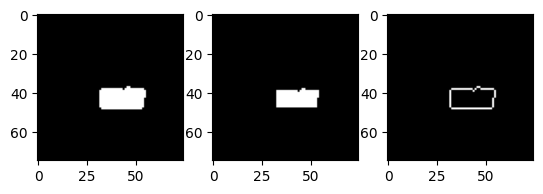

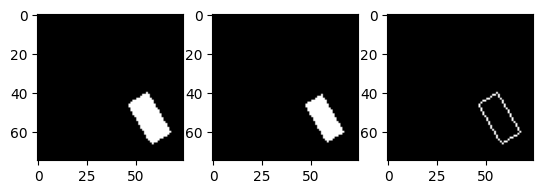

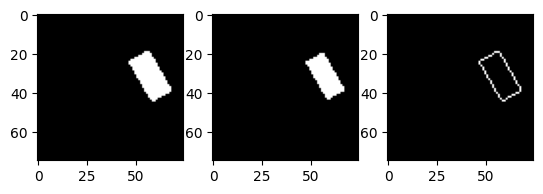

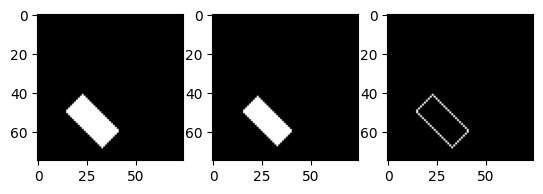

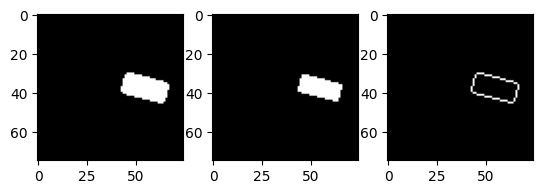

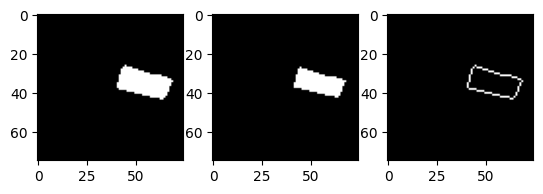

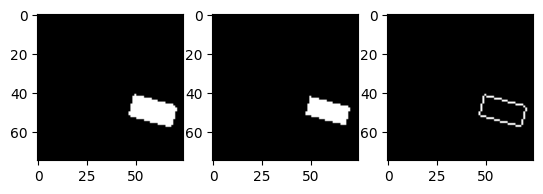

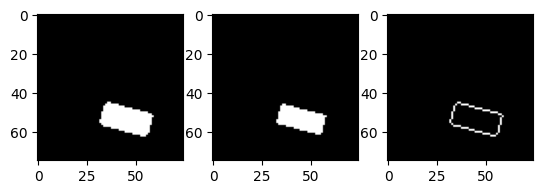

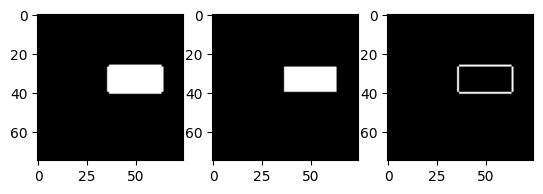

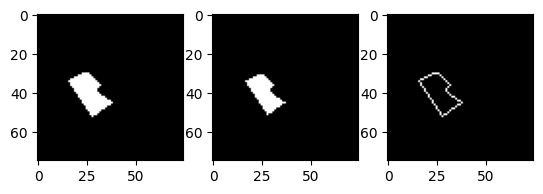

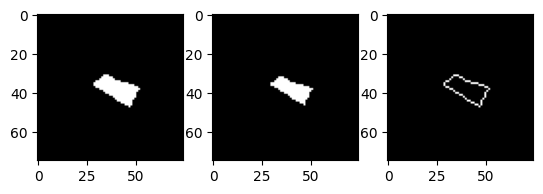

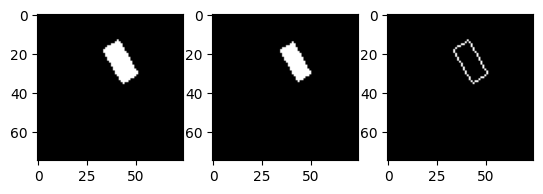

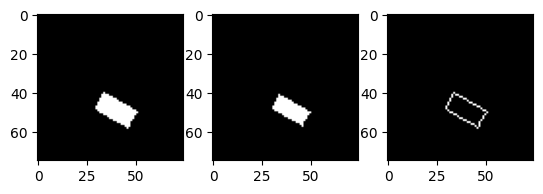

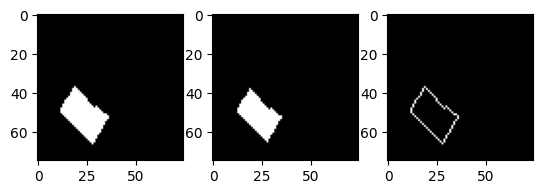

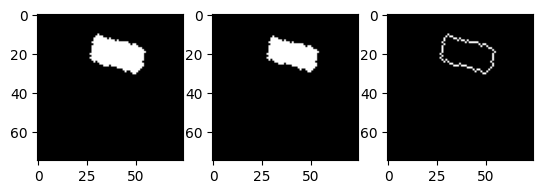

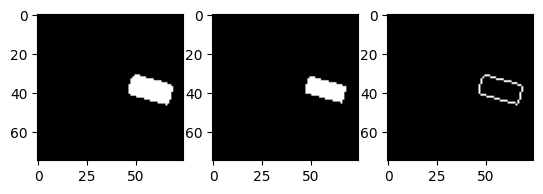

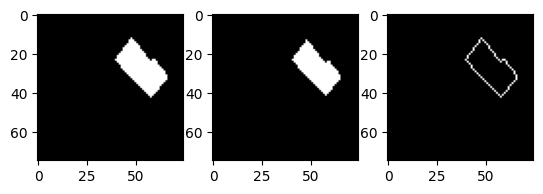

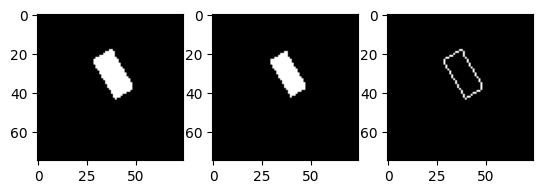

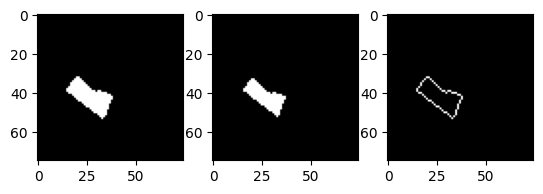

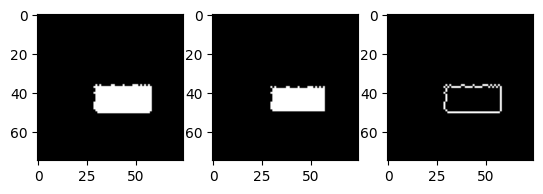

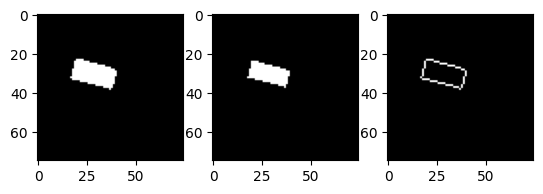

In [9]:
import cv2
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow
for i in range(len(im_names)):
  if im_types[i]==1:
    
    # Changing colorspace to HSV and choosing Value for further analysis
    im_hsv = cv2.imread(im_paths[i],cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(im_hsv)
    
    # Threshold Computing
    threshold3 = get_treshold(v)
    
    # Binarization
    v[v>threshold3] = 255
    v[v<=threshold3] = 0
    
    # Morphology
    kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
    v = cv2.morphologyEx(v, cv2.MORPH_CLOSE, kernel)
    v = cv2.morphologyEx(v, cv2.MORPH_OPEN, kernel)
    
    v_erosion = cv2.morphologyEx(v, cv2.MORPH_ERODE, kernel)

    v_edge = v - v_erosion

    plt.subplot(1,3,1)
    plt.imshow(v,cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(v_erosion,cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(v_edge,cmap='gray')

    plt.show()

In [12]:
def get_min_max_dis_ratio(edge_im):
  h, w =edge_im.shape
  
  x_position = np.array([list(range(w)) for _ in range(h)])
  y_position = np.array([[x]*w for x in range(h)])

  x_edge_position = x_position*edge_im
  y_edge_position = y_position*edge_im

  N_x = np.count_nonzero(x_edge_position)
  N_y = np.count_nonzero(y_edge_position)

  cX = np.sum(x_edge_position)/N_x
  cY = np.sum(y_edge_position)/N_y
 
  x_c_vers = x_edge_position - cX
  y_c_vers = y_edge_position - cY

  c_distance =np.sqrt(x_c_vers*x_c_vers + y_c_vers*y_c_vers) 

  max_dis = np.max(c_distance)
  min_dis = np.min(c_distance)

  return max_dis/min_dis

In [25]:
def get_treshold_list(ls):
  ls = np.array(ls)
  T = np.mean(ls)
  while(1):
    higher = ls.copy() 
    lower = ls.copy()
    
    higher[higher<T]=0
    lower[lower>=T]=0

    N_h = np.count_nonzero(higher)
    N_l = np.count_nonzero(lower)

    mean_h = np.sum(higher)/N_h
    mean_l = np.sum(lower)/N_l

    T1 = (mean_h + mean_l)/2

    if (T1-T)<0.5:
      T = float(T1)
      break
    else: 
      T = float(T1)
  
  return T1

0.95
0.9591836734693877


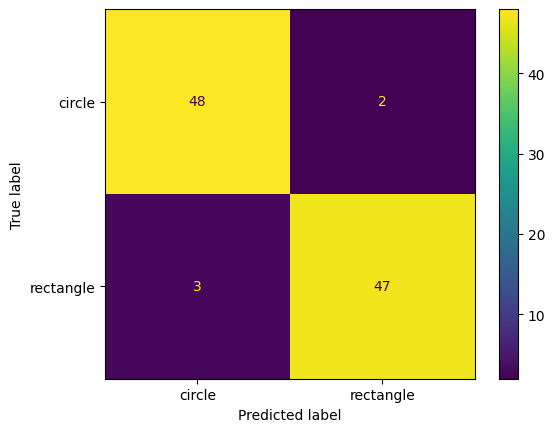

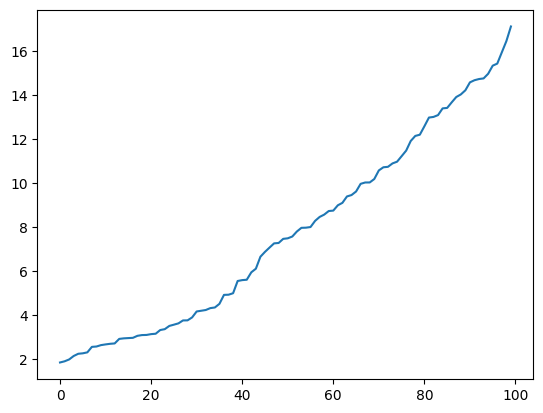

In [50]:
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

A_P_ratios = []
M_M_ratios = []

for i in range(len(im_names)):
  # Changing colorspace to HSV and choosing Value for further analysis
  im_hsv = cv2.imread(im_paths[i],cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(im_hsv)
  
  # Threshold Computing
  threshold3 = get_treshold(v)
  
  # Binarization
  v[v>threshold3] = 255
  v[v<=threshold3] = 0
  
  # Morphology
  kernel = np.array([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
  v = cv2.morphologyEx(v, cv2.MORPH_CLOSE, kernel)
  v = cv2.morphologyEx(v, cv2.MORPH_OPEN, kernel)
  
  v_erosion = cv2.morphologyEx(v, cv2.MORPH_ERODE, kernel)

  v_edge = v - v_erosion

  field = np.sum(v)
  perimeter = np.sum(v_edge)

  ratio = field/perimeter

  A_P_ratios.append(ratio)

  M_M_ratios.append(get_min_max_dis_ratio(v_edge))

predictions = np.array(M_M_ratios.copy())
predictions[predictions>7.5] = 10
predictions[predictions<=7.5] = 0
predictions= predictions/10
predictions.astype(int)

true_values_ls = im_types
predictions_ls = predictions.tolist()
true_values = np.array(true_values_ls)

N = true_values.size
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
precision = TP / (TP+FP)

print(accuracy)
print(precision)

cm = confusion_matrix(true_values_ls,predictions_ls)
target_names = ['circle','rectangle']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.show()
plt.plot(sorted(M_M_ratios))
plt.show()

Można zauważyć, że stosunek Pola do obwodu jest kiepskim deskryptorem kształtu:
obraz nr 1 oraz obraz nr 3 mają bardzo podobną wartośc mimo przynależności do róznych grup

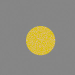

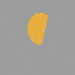

In [14]:
im_hsv1 = cv2.imread(im_paths[0],cv2.COLOR_BGR2HSV)
cv2_imshow(im_hsv1)
im_hsv2 = cv2.imread(im_paths[2],cv2.COLOR_BGR2HSV)
cv2_imshow(im_hsv2)